## HR Analytics classification task EDA

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import socket
from matplotlib import rcParams
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10,10

In [9]:
data = pd.read_csv(r'/home/sd-work/Code/NID-LUFlow/EDA/2021.01.31.csv')

In [10]:
irrelevant_labels = ["dest_ip", "src_ip", "time_end", "time_start"]

data = data.drop( columns = irrelevant_labels, axis = 1 )

In [12]:
prefix = "IPPROTO_"

table = {num:name[len(prefix):] 
          for name,num in vars(socket).items()
            if name.startswith(prefix)}

print(table)



for i in range(len(data.iloc[ : , 7 ])):
    data.iloc[ i , 7] = (table[data.iloc[ i , 7]]).lower()

{0: 'HOPOPTS', 1: 'ICMP', 2: 'IGMP', 41: 'IPV6', 4: 'IPIP', 6: 'TCP', 8: 'EGP', 12: 'PUP', 17: 'UDP', 136: 'UDPLITE', 22: 'IDP', 29: 'TP', 43: 'ROUTING', 44: 'FRAGMENT', 46: 'RSVP', 47: 'GRE', 50: 'ESP', 51: 'AH', 58: 'ICMPV6', 59: 'NONE', 60: 'DSTOPTS', 103: 'PIM', 132: 'SCTP', 262: 'MPTCP', 255: 'RAW'}


In [13]:
data.shape

(1003352, 12)

In [14]:
data.dtypes

avg_ipt          float64
bytes_in           int64
bytes_out          int64
dest_port        float64
entropy          float64
num_pkts_out       int64
num_pkts_in        int64
proto             object
src_port         float64
total_entropy    float64
label             object
duration         float64
dtype: object

In [15]:
data.head()

,avg_ipt,bytes_in,bytes_out,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_port,total_entropy,label,duration
0,0.0,0,7430,9200.0,3.162032,6,0,tcp,49916.0,23493.895000,benign,0.000110
1,0.0,0,17,9200.0,3.734521,1,0,tcp,49916.0,63.486862,benign,0.000000
2,0.0,0,1369,9200.0,5.016474,1,1,tcp,50368.0,6867.552700,benign,0.000391
3,0.0,0,0,49924.0,0.000000,5,0,tcp,9200.0,0.000000,benign,0.000124
4,0.0,0,358,50368.0,7.042293,1,0,tcp,9200.0,2521.140900,benign,0.000000


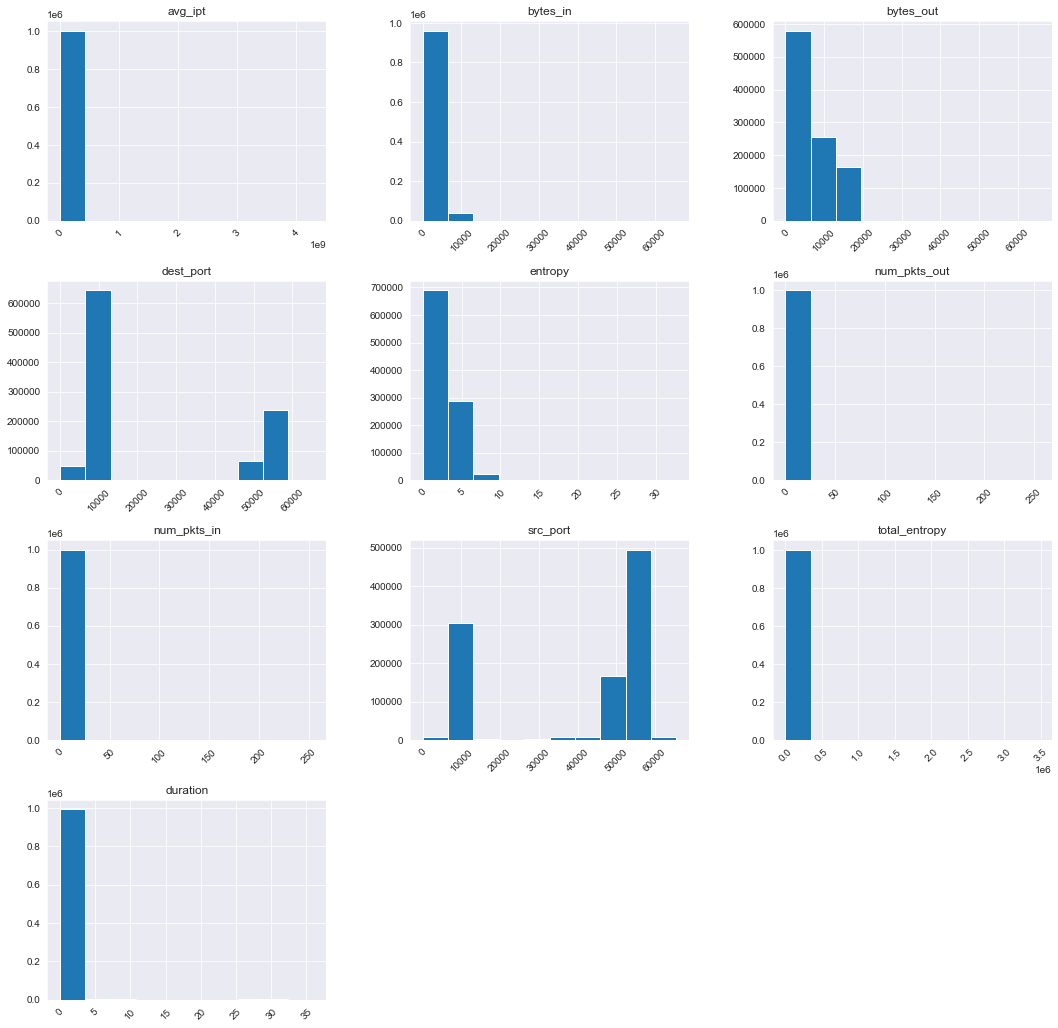

In [32]:
data.hist(figsize=(18,18), xrot=45)
plt.show()

Training hours is really the only numerical variable that seems relevant here.

In [18]:
data.describe()

,avg_ipt,bytes_in,bytes_out,dest_port,entropy,num_pkts_out,num_pkts_in,src_port,total_entropy,duration
count,1.003352e+06,1.003352e+06,1.003352e+06,1.000173e+06,1.003352e+06,1.003352e+06,1.003352e+06,1.000173e+06,1.003352e+06,1.003352e+06
mean,1.621552e+06,6.081342e+02,5.806737e+03,2.216487e+04,2.595646e+00,5.817283e+00,1.372330e+00,3.869857e+04,2.037194e+04,1.786825e-01
std,4.758056e+07,2.883325e+03,6.154818e+03,2.031284e+04,2.215289e+00,9.405396e+00,7.450317e+00,2.028858e+04,9.367618e+04,1.908932e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,9.200000e+03,0.000000e+00,2.000000e+00,0.000000e+00,9.200000e+03,0.000000e+00,1.900000e-05
50%,0.000000e+00,0.000000e+00,4.344000e+03,9.200000e+03,2.324998e+00,5.000000e+00,0.000000e+00,5.324200e+04,2.297681e+04,6.000000e-05
75%,0.000000e+00,0.000000e+00,1.158400e+04,4.992600e+04,3.933259e+00,9.000000e+00,1.000000e+00,5.350800e+04,2.737980e+04,1.590000e-04
max,4.294967e+09,6.553300e+04,6.549900e+04,6.552900e+04,3.261491e+01,2.550000e+02,2.550000e+02,6.553400e+04,3.475372e+06,3.602003e+01


In [19]:
data.describe(include='object')

,proto,label
count,1003352,1003352
unique,4,3
top,tcp,benign
freq,997593,942004


Every categorical feature other than city and relevant_experience have missing values

### Distribution of categorical features

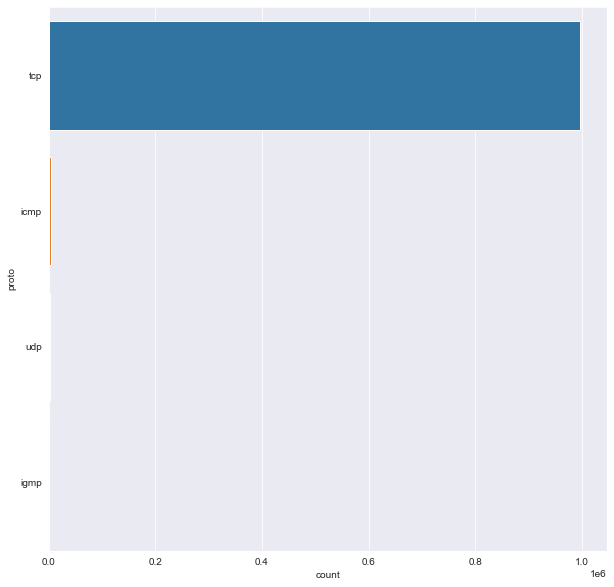

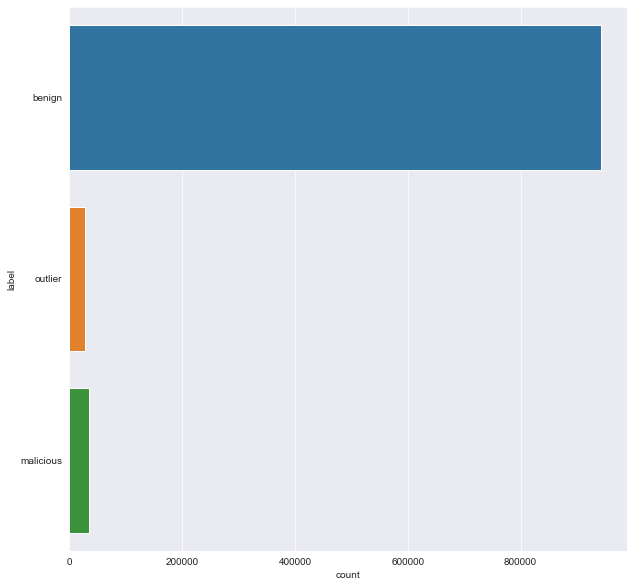

In [33]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 22:
        sns.countplot(y=col, data=data)
        plt.show()

#### Segment target by numerical features

In [25]:
sample = data.iloc[ 0 , :]


numeric_cols = []

idx =  0

for sam in sample:

    if type(sam) == np.int64 or type(sam) == np.float64:
        numeric_cols.append(idx)
        

        
    idx += 1

print(numeric_cols)


col = data.columns
names = col[numeric_cols]
print(names)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 11]
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'src_port', 'total_entropy', 'duration'],
      dtype='object')


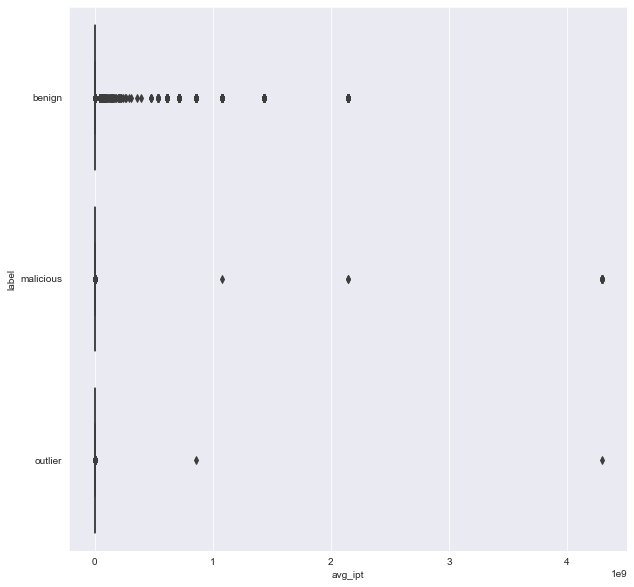

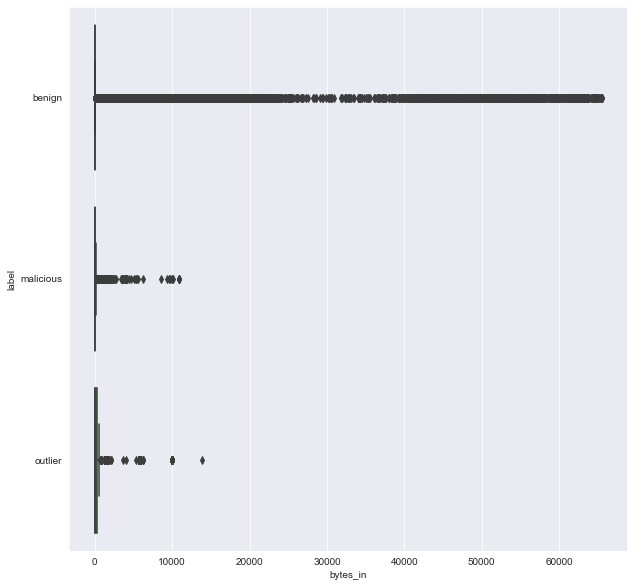

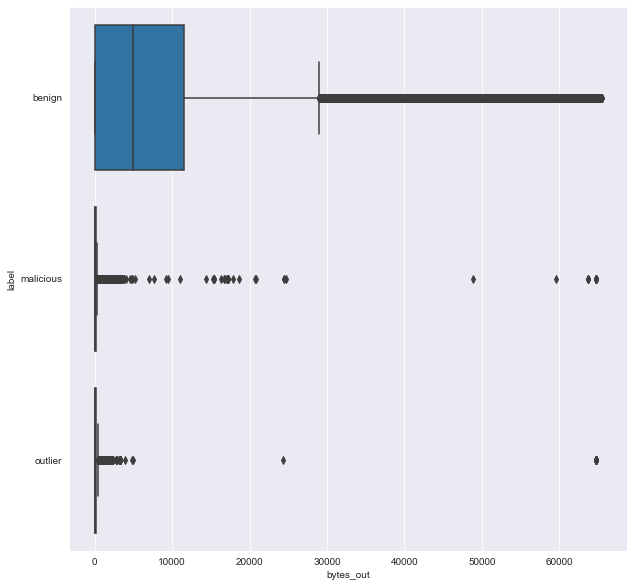

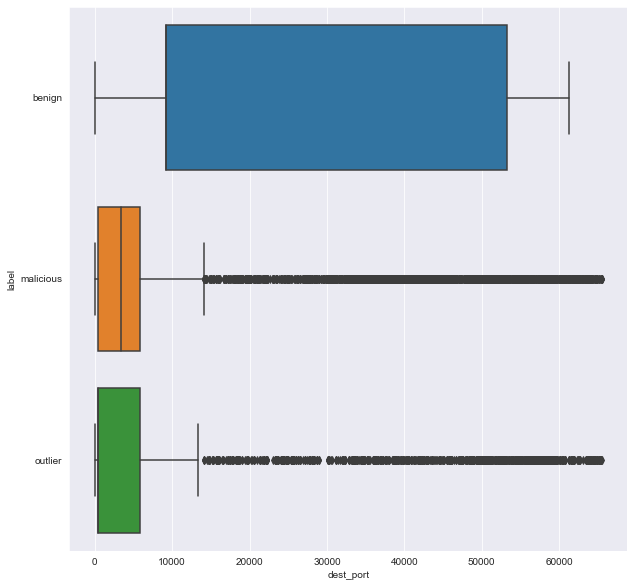

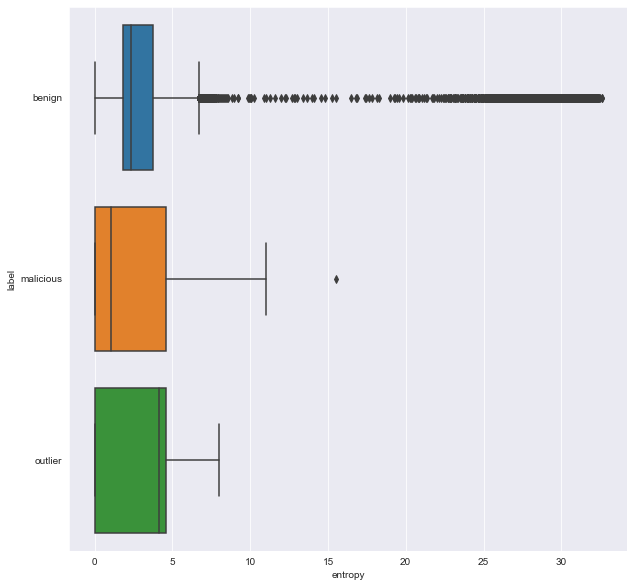

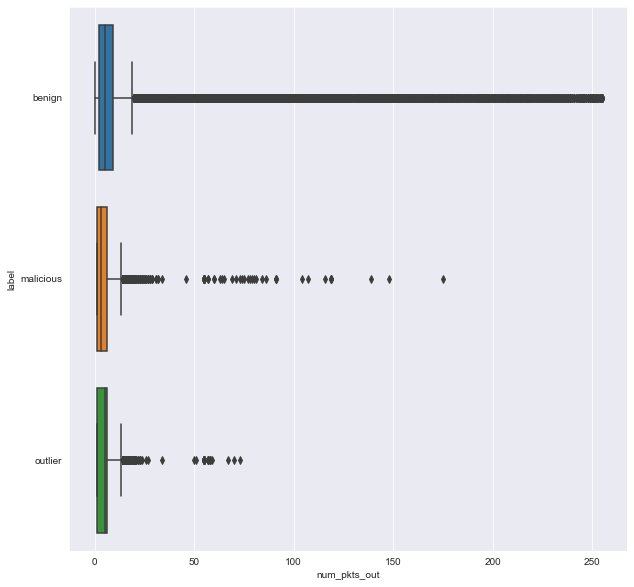

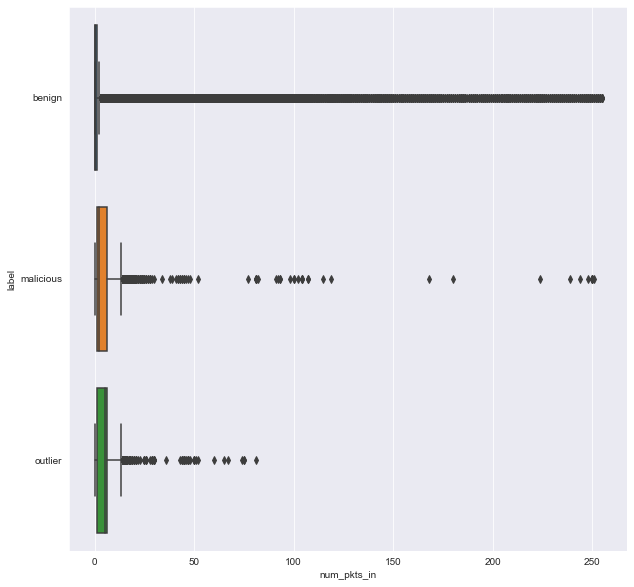

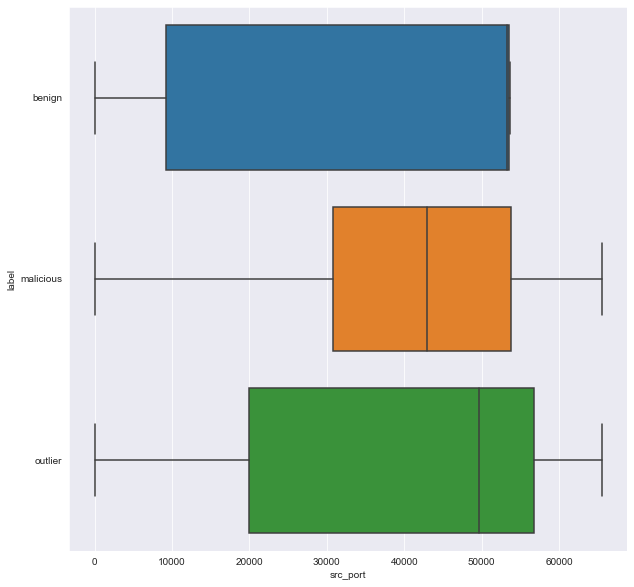

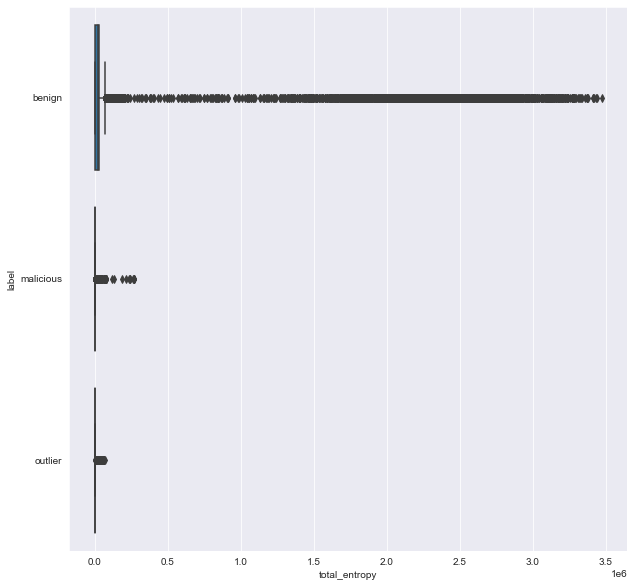

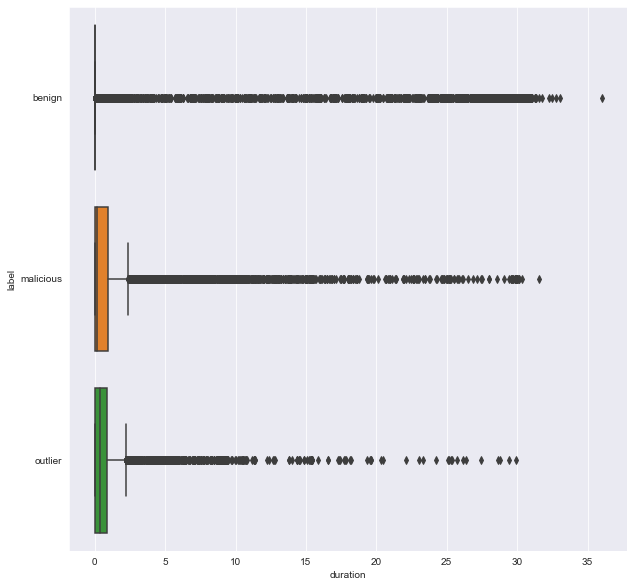

In [34]:

for col in names:
    sns.boxplot(y = data['label'].astype('category'), x = col, data=data)
    plt.show()

### Target feature vs the other categorical features
#### Cross tab
We use crosstab because target here is a numeric feature. If it was categorical, use boxplot or violin plot, as shown further down below

Using crosstab to show tables of target vs categorical features

In [35]:
pd.crosstab(data['label'], data['proto'])

proto,icmp,igmp,tcp,udp
label,,,,
benign,0,1,941661,342
malicious,2977,0,30215,831
outlier,201,0,25717,1407


### Target across categorical features

Using only 3 categorical features - those with less than 4 classes

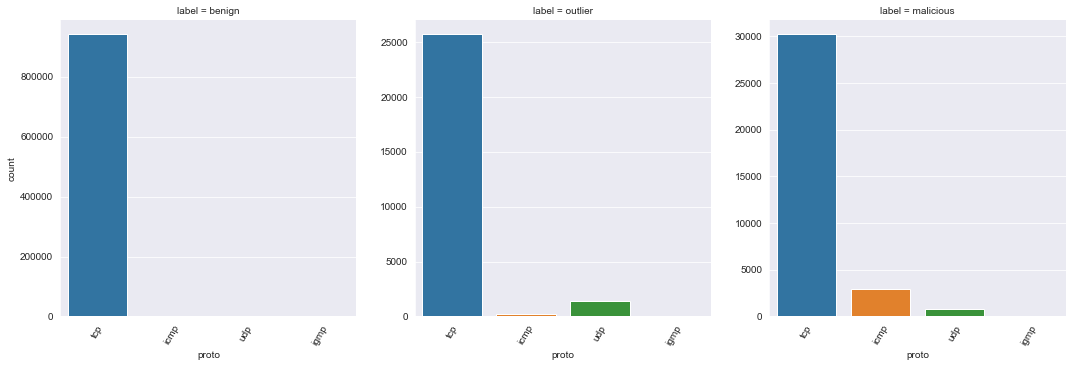

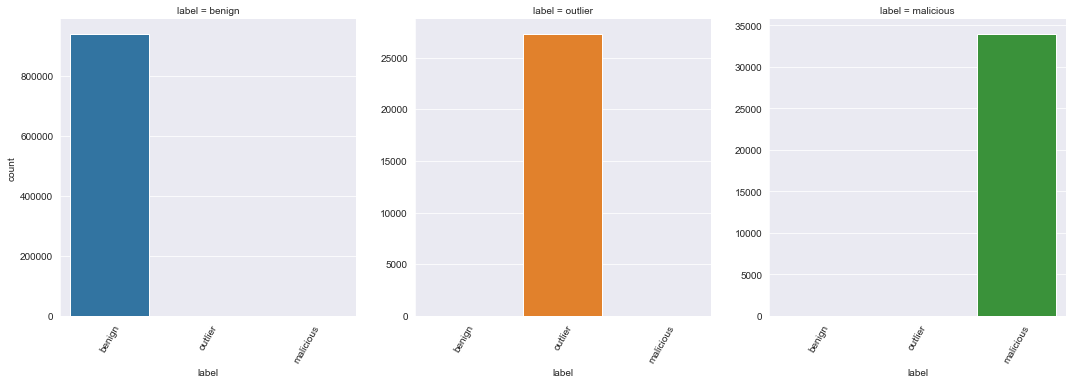

In [37]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 4:
        g = sns.catplot(x = col, kind='count', col = 'label', data=data, sharey=False)
        g.set_xticklabels(rotation=60)

### All Categorical vs all numeric features

In [38]:
data.groupby('label').mean()

/tmp/ipykernel_2042090/2955878230.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('label').mean()


,avg_ipt,bytes_in,bytes_out,dest_port,entropy,num_pkts_out,num_pkts_in,src_port,total_entropy,duration
label,,,,,,,,,,
benign,1.656707e+06,637.342364,6173.351456,23142.616801,2.601713,5.936685,1.227353,38647.278497,21585.567101,0.130796
malicious,1.798960e+06,158.577786,196.617376,7391.765445,2.303977,3.832819,3.481174,38757.929298,2028.403219,1.039495
outlier,1.886928e+05,160.961793,153.324318,5117.604962,2.749660,4.171930,3.744520,40411.829487,1373.259802,0.757699


#### Correlations

In [40]:
corr = data.corr()
corr

/tmp/ipykernel_2042090/2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,avg_ipt,bytes_in,bytes_out,dest_port,entropy,num_pkts_out,num_pkts_in,src_port,total_entropy,duration
avg_ipt,1.000000,0.017084,-0.015960,-0.021542,0.062844,0.007041,0.024870,0.018725,0.020651,0.022909
bytes_in,0.017084,1.000000,-0.008778,0.231052,0.348700,0.420199,0.674248,-0.221429,0.665163,0.529076
bytes_out,-0.015960,-0.008778,1.000000,-0.600412,0.109568,0.500166,0.179529,0.655150,0.306609,0.251348
dest_port,-0.021542,0.231052,-0.600412,1.000000,-0.390363,-0.158780,-0.028587,-0.951996,-0.102121,-0.066990
entropy,0.062844,0.348700,0.109568,-0.390363,1.000000,0.206787,0.401015,0.380955,0.490087,0.307199
num_pkts_out,0.007041,0.420199,0.500166,-0.158780,0.206787,1.000000,0.678411,0.173398,0.558970,0.789418
num_pkts_in,0.024870,0.674248,0.179529,-0.028587,0.401015,0.678411,1.000000,0.014901,0.704104,0.796012
src_port,0.018725,-0.221429,0.655150,-0.951996,0.380955,0.173398,0.014901,1.000000,0.114488,0.049632
total_entropy,0.020651,0.665163,0.306609,-0.102121,0.490087,0.558970,0.704104,0.114488,1.000000,0.625015
duration,0.022909,0.529076,0.251348,-0.066990,0.307199,0.789418,0.796012,0.049632,0.625015,1.000000


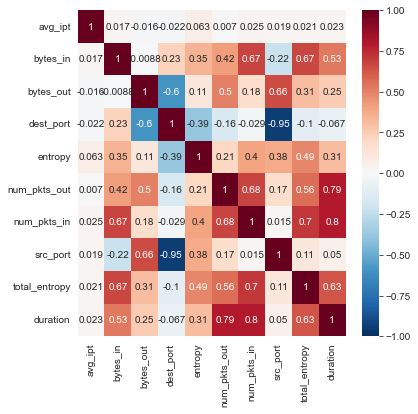

In [41]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()